In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
!pip install ta
import ta

In [ ]:
# Importing the dataset from Yahoo finance.
Intel_data = yf.download("INTC",
                 start = "2022-01-01",
                 end = "2022-01-31")
Intel_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,51.650002,53.230000,51.599998,53.209999,52.807728,33857600
2022-01-04,53.570000,53.939999,52.650002,53.139999,52.738258,45681400
2022-01-05,54.189999,56.169998,53.830002,53.869999,53.462738,59109300
2022-01-06,54.610001,54.669998,53.419998,54.009998,53.601677,35757900
2022-01-07,54.189999,54.389999,53.150002,53.439999,53.035988,30702600


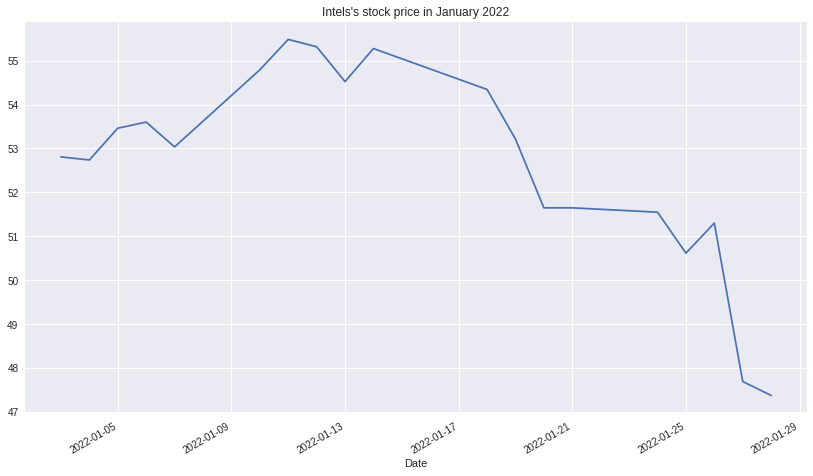

In [ ]:
# Ploting Intels stock price (based on the Adj Close price)
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]
Intel_data["Adj Close"].plot(title = "Intels's stock price in January 2022")

In [ ]:
# Creating new dataset for bollinger bands.
bollinger_bands = ta.volatility.BollingerBands(close=Intel_data["Adj Close"], window = 5, window_dev = 2)
BB_df = Intel_data.copy()
BB_df["Moving_Average"] = bollinger_bands.bollinger_mavg()
BB_df["High"] = bollinger_bands.bollinger_hband()
BB_df["Low"] = bollinger_bands.bollinger_lband()
BB_df.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Average
Date,,,,,,,
2022-01-03,51.650002,NaN,NaN,53.209999,52.807728,33857600,NaN
2022-01-04,53.570000,NaN,NaN,53.139999,52.738258,45681400,NaN
2022-01-05,54.189999,NaN,NaN,53.869999,53.462738,59109300,NaN
2022-01-06,54.610001,NaN,NaN,54.009998,53.601677,35757900,NaN
2022-01-07,54.189999,53.821723,52.436833,53.439999,53.035988,30702600,53.129278


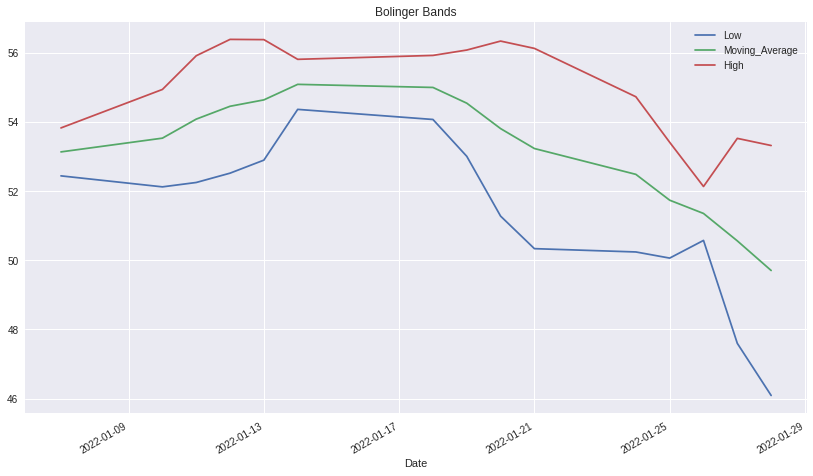

In [ ]:
# Plotting Bollinger Bands
BB_df[["Low", "Moving_Average", "High"]].plot(title = "Bolinger Bands")

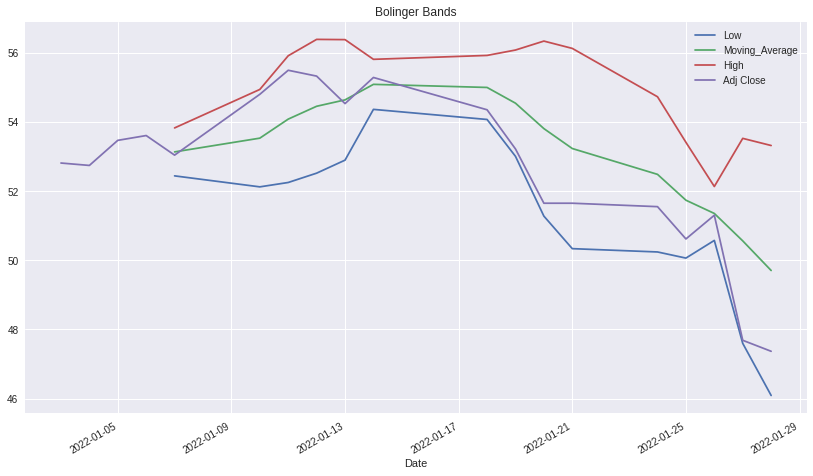

In [ ]:
# Plotting Bollinger Bands with Intels stock price
BB_df[["Low", "Moving_Average", "High","Adj Close"]].plot(title = "Bolinger Bands")